The first question of part two

In [ ]:
from sklearn.linear_model import LogisticRegression,SGDClassifier
from sklearn.svm import LinearSVC
import sklearn.metrics as mc
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification

import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

import warnings
from sklearn.exceptions import ConvergenceWarning
warnings.filterwarnings("ignore", category=ConvergenceWarning)
from mlxtend.plotting import plot_decision_regions

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
X,y=make_classification(n_samples=3000, n_features=2,n_redundant=0,n_clusters_per_class=1,n_classes=2,class_sep=1,random_state=4)
print(X.shape)
print(y.shape)

(3000, 2)
(3000,)


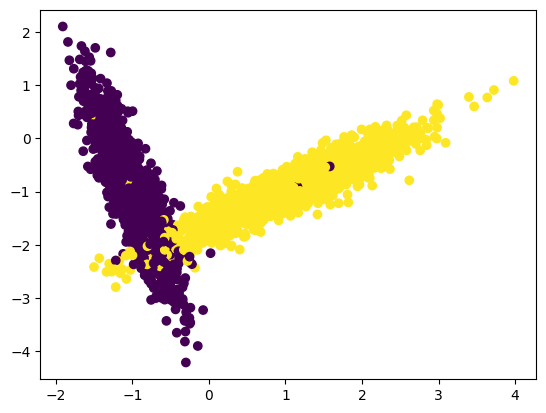

In [ ]:
plt.scatter(X[:,0],X[:,1],c=y)

Answer to question 3, part 1

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4, stratify=y)

x_train.shape, y_train.shape, x_test.shape, y_test.shape

((2400, 2), (2400,), (600, 2), (600,))

In [ ]:
# Calculate label distribution for y_train
labels_train, counts_train = np.unique(y_train, return_counts=True)
print("Label distribution for y_train:")
print(counts_train / float(len(y_train)))

# Calculate label distribution for y_test
labels_test, counts_test = np.unique(y_test, return_counts=True)
print("\nLabel distribution for y_test:")
print(counts_test / float(len(y_test)))

Label distribution for y_train:
[0.49916667 0.50083333]

Label distribution for y_test:
[0.5 0.5]


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

lr_model = LogisticRegression(solver='sag', max_iter=20, random_state=4)
lr_model.fit(x_train, y_train)
y_pred = lr_model.predict(x_test)

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy*100:.2f}%')

train_accuracy = lr_model.score(x_train, y_train)
test_accuracy = lr_model.score(x_test, y_test)
print(f'Training Accuracy: {train_accuracy*100:.2f}%')
print(f'Testing Accuracy: {test_accuracy*100:.2f}%')

# Confusion Matrix
print('\nConfusion Matrix:')
cm = confusion_matrix(y_test, y_pred)
print(cm)

# Predicted probabilities for the last 20 samples
print('\nPredicted Probabilities for the last 20 samples:')
print(lr_model.predict_proba(x_test)[-20:])

# Check if predicted labels match true labels
print('\nPredicted labels match true labels:')
print(y_pred == y_test)

Accuracy: 96.00%
Training Accuracy: 96.75%
Testing Accuracy: 96.00%

Confusion Matrix:
[[297   3]
 [ 21 279]]

Predicted Probabilities for the last 20 samples:
[[3.06532069e-02 9.69346793e-01]
 [9.88736342e-01 1.12636578e-02]
 [2.82876017e-02 9.71712398e-01]
 [9.72374125e-01 2.76258754e-02]
 [9.89315912e-01 1.06840883e-02]
 [9.78296113e-01 2.17038874e-02]
 [2.79902658e-03 9.97200973e-01]
 [9.94268515e-01 5.73148474e-03]
 [8.74014629e-01 1.25985371e-01]
 [9.92920596e-01 7.07940433e-03]
 [8.35563353e-05 9.99916444e-01]
 [1.81171872e-05 9.99981883e-01]
 [9.85527959e-01 1.44720412e-02]
 [9.72960736e-01 2.70392637e-02]
 [2.37892987e-03 9.97621070e-01]
 [2.28567761e-03 9.97714322e-01]
 [9.00349533e-01 9.96504673e-02]
 [8.86746165e-07 9.99999113e-01]
 [9.95341991e-01 4.65800876e-03]
 [9.87370436e-01 1.26295642e-02]]

Predicted labels match true labels:
[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  T

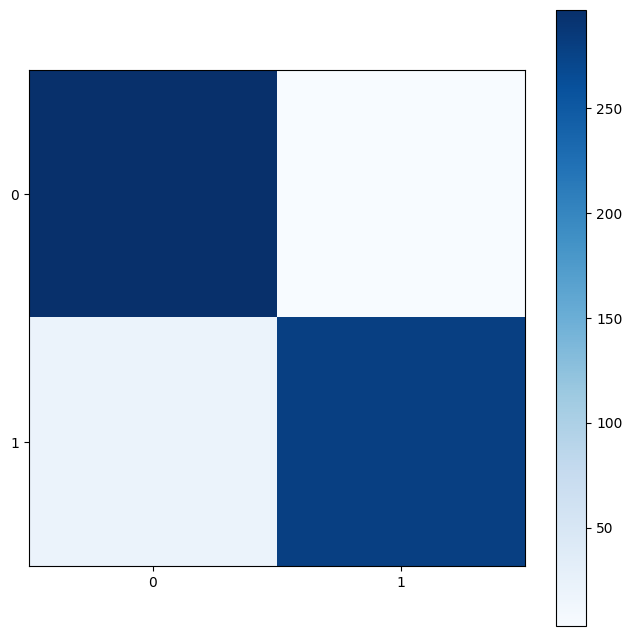

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 8))
plt.imshow(cm, cmap=plt.cm.Blues, interpolation='nearest')

# Add color bar
plt.colorbar()

plt.xticks(range(2))
plt.yticks(range(2))

plt.show()

In [ ]:
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

# ساخت مدل
model_sgd = SGDClassifier(loss="hinge", max_iter=2000, random_state=4, learning_rate='optimal', alpha=0.01)

# آموزش مدل
model_sgd.fit(x_train, y_train)
y_pred = model_sgd.predict(x_test)

# محاسبه دقت
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy*100:.2f}%')

train_accuracy = model_sgd.score(x_train, y_train)
test_accuracy = model_sgd.score(x_test, y_test)
print(f'Training Accuracy: {train_accuracy*100:.2f}%')
print(f'Testing Accuracy: {test_accuracy*100:.2f}%')

# ماتریس درهم ریختگی
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))

print(model_sgd.decision_function(x_test)[-20:])
print(y_pred == y_test)

Accuracy: 95.67%
Training Accuracy: 96.62%
Testing Accuracy: 95.67%
Confusion Matrix:
[[298   2]
 [ 24 276]]
[ 1.40752466 -1.74767121  1.50917091 -1.45770233 -1.69153538 -1.64978938
  2.40655453 -1.8650209  -1.05405338 -1.84184583  4.12817924  4.74302032
 -1.57091106 -1.80674995  2.49883417  2.56494844 -1.26128978  6.02182671
 -1.96164018 -1.37270478]
[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True False  True  True  True
  True  True  True  True False  True  True  True  True  True  True  True
  True  True  True  True  True  True False  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  

Question 1, part 4

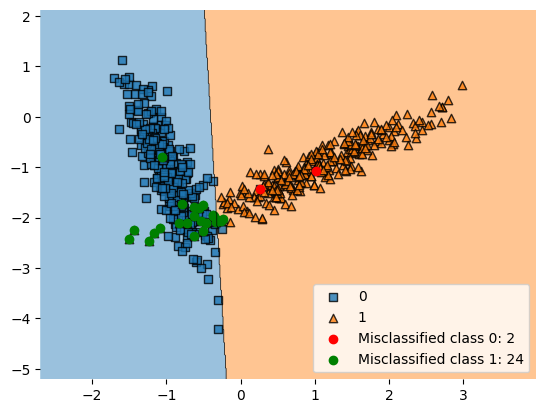

In [ ]:
from mlxtend.plotting import plot_decision_regions

# نمایش نمودار تصمیم همراه با داده‌های اشتباه کلاس‌بندی شده
plot_decision_regions(x_test, y_test, clf=lr_model, legend=1)

# شناسایی داده‌های اشتباه کلاس‌بندی شده
misclassified = np.where(y_test != y_pred)

# تعداد خطاهای کلاس‌بندی شده برای هر کلاس
errors_class_0 = np.sum(y_test[misclassified] == 0)
errors_class_1 = np.sum(y_test[misclassified] == 1)

# نمایش داده‌های اشتباه کلاس‌بندی شده برای کلاس 0 با رنگ قرمز
plt.scatter(x_test[misclassified][y_test[misclassified] == 0, 0],
            x_test[misclassified][y_test[misclassified] == 0, 1],
            color='red', label=f'Misclassified class 0: {errors_class_0}')

# نمایش داده‌های اشتباه کلاس‌بندی شده برای کلاس 1 با رنگ سبز
plt.scatter(x_test[misclassified][y_test[misclassified] == 1, 0],
            x_test[misclassified][y_test[misclassified] == 1, 1],
            color='green', label=f'Misclassified class 1: {errors_class_1}')

plt.legend()
plt.show()

In [ ]:
!pip install drawdata

In [ ]:
from drawdata import ScatterWidget
widget = ScatterWidget()
widget

ScatterWidget()

In [ ]:
widget.data
widget_data=widget.data_as_pandas

In [ ]:
!gdown 1hA-Uvoqa5pRXOrQS7R4dzVV7rSKEtuJl

Downloading...
From: https://drive.google.com/uc?id=1hA-Uvoqa5pRXOrQS7R4dzVV7rSKEtuJl
To: /content/drawdata_2.csv
100% 47.2k/47.2k [00:00<00:00, 74.5MB/s]


In [ ]:
widget_data.to_csv('/content/drive/MyDrive/dataset_p1/drawdata_2.csv', index=False)


In [ ]:
import pandas as pd
df=pd.read_csv(r'/content/drive/MyDrive/dataset_p1/drawdata_2.csv')

In [ ]:
df=df.drop(columns=['color'])
df.keys()

Index(['x', 'y', 'label'], dtype='object')

In [ ]:
print(df.shape)
df

(1011, 3)


,x,y,label
0,145.523539,462.089725,a
1,136.386809,424.665452,a
2,111.994418,418.772924,a
3,129.777230,374.301639,a
4,83.243550,322.614632,a
...,...,...,...
1006,708.118661,235.678515,c
1007,725.701293,238.205783,c
1008,735.801119,209.377308,c
1009,728.260475,230.634910,c


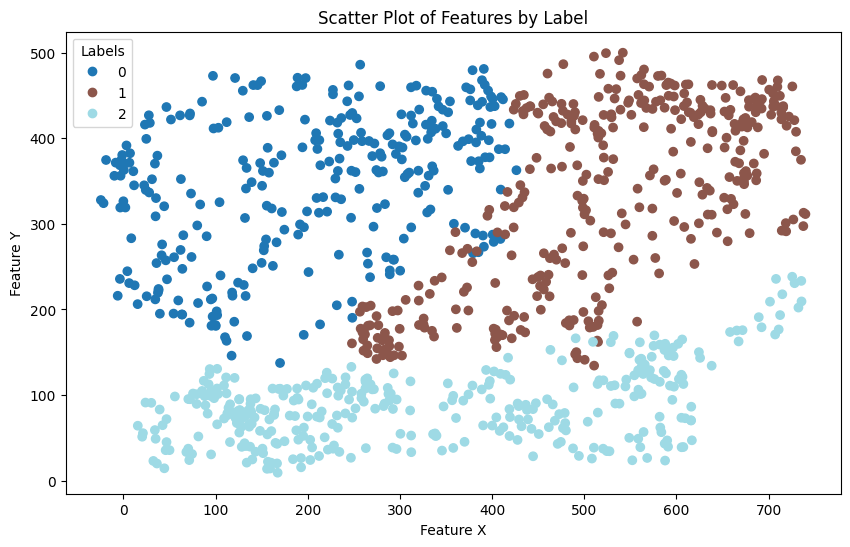

In [ ]:
plt.figure(figsize=(10, 6))
scatter = plt.scatter(df['x'], df['y'], c=df['label'].astype('category').cat.codes, cmap='tab20')
plt.title('Scatter Plot of Features by Label')
plt.xlabel('Feature X')
plt.ylabel('Feature Y')
legend1 = plt.legend(*scatter.legend_elements(), title="Labels")
plt.show()

In [ ]:
df

,x,y,label
0,145.523539,462.089725,a
1,136.386809,424.665452,a
2,111.994418,418.772924,a
3,129.777230,374.301639,a
4,83.243550,322.614632,a
...,...,...,...
1006,708.118661,235.678515,c
1007,725.701293,238.205783,c
1008,735.801119,209.377308,c
1009,728.260475,230.634910,c


In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df[['x', 'y']] = scaler.fit_transform(df[['x', 'y']])
df

,x,y,label
0,0.222413,0.922951,a
1,0.210462,0.846675,a
2,0.178558,0.834666,a
3,0.201817,0.744027,a
4,0.140954,0.638681,a
...,...,...,...
1006,0.958256,0.461492,c
1007,0.981253,0.466643,c
1008,0.994464,0.407887,c
1009,0.984601,0.451213,c


In [ ]:
label_mapping = {'a': 0, 'b': 1, 'c': 2}
# Convert text labels to numbers using
df['label_new'] = df['label'].map(label_mapping)
print(df)

             x         y label  label_new
0     0.222413  0.922951     a          0
1     0.210462  0.846675     a          0
2     0.178558  0.834666     a          0
3     0.201817  0.744027     a          0
4     0.140954  0.638681     a          0
...        ...       ...   ...        ...
1006  0.958256  0.461492     c          2
1007  0.981253  0.466643     c          2
1008  0.994464  0.407887     c          2
1009  0.984601  0.451213     c          2
1010  0.994140  0.456734     c          2

[1011 rows x 4 columns]


In [ ]:
X=df.iloc[:,0:2].values
y=df.iloc[:,3].values
print(X.shape)
print(y.shape)
print(X)
print(y)

(1011, 2)
(1011,)
[[0.22241263 0.92295148]
 [0.21046228 0.84667534]
 [0.17855837 0.83466551]
 ...
 [0.99446351 0.40788663]
 [0.98460076 0.45121273]
 [0.9941402  0.45673444]]
[0 0 0 ... 2 2 2]


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=4,stratify=y)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((808, 2), (808,), (203, 2), (203,))

In [ ]:
y_train

array([0, 1, 2, 2, 0, 0, 2, 1, 2, 1, 1, 1, 2, 1, 0, 0, 0, 0, 2, 1, 2, 1,
       1, 1, 1, 0, 1, 0, 1, 2, 2, 1, 1, 0, 0, 2, 2, 2, 0, 1, 0, 1, 2, 0,
       0, 0, 1, 1, 2, 0, 1, 2, 2, 0, 1, 1, 2, 1, 1, 2, 0, 0, 2, 2, 2, 0,
       2, 2, 1, 0, 2, 2, 0, 0, 1, 0, 2, 1, 2, 2, 2, 1, 0, 1, 0, 2, 1, 1,
       2, 2, 1, 1, 1, 1, 1, 1, 0, 0, 2, 1, 2, 2, 1, 2, 1, 0, 2, 2, 0, 0,
       1, 2, 1, 0, 2, 1, 0, 1, 2, 0, 2, 1, 2, 1, 2, 1, 1, 0, 0, 1, 0, 0,
       0, 1, 1, 0, 1, 2, 0, 2, 0, 2, 2, 0, 2, 2, 2, 0, 2, 1, 2, 1, 0, 0,
       0, 2, 2, 1, 1, 1, 1, 2, 0, 1, 0, 0, 2, 0, 2, 2, 0, 1, 1, 1, 0, 0,
       1, 0, 1, 2, 2, 0, 1, 0, 1, 2, 2, 2, 1, 2, 0, 1, 2, 2, 0, 0, 1, 0,
       1, 1, 1, 2, 2, 0, 1, 2, 1, 2, 2, 0, 2, 1, 1, 0, 1, 2, 0, 2, 0, 1,
       0, 0, 1, 2, 1, 2, 1, 0, 2, 0, 0, 2, 1, 0, 1, 2, 1, 2, 1, 2, 1, 2,
       0, 1, 2, 1, 1, 2, 0, 1, 1, 2, 2, 2, 0, 2, 1, 0, 1, 2, 0, 1, 2, 2,
       0, 2, 0, 0, 1, 1, 1, 1, 2, 0, 2, 2, 2, 2, 0, 0, 0, 0, 2, 1, 0, 0,
       1, 0, 1, 1, 2, 1, 1, 0, 0, 1, 1, 0, 2, 1, 2,

In [ ]:
labels,counts=np.unique(y_train,return_counts=True)
print(counts/float(len(y)))
labels,counts=np.unique(y_test,return_counts=True)
print(counts/float(len(y)))

[0.23244313 0.28783383 0.27893175]
[0.05835806 0.07220574 0.0702275 ]


In [ ]:
lr_model = LogisticRegression(solver='sag', max_iter=100, random_state=4)
lr_model.fit(x_train, y_train)
y_pred = lr_model.predict(x_test)

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy*100:.2f}%')

train_accuracy = lr_model.score(x_train, y_train)
test_accuracy = lr_model.score(x_test, y_test)
print(f'Training Accuracy: {train_accuracy*100:.2f}%')
print(f'Testing Accuracy: {test_accuracy*100:.2f}%')

# The clutter matrix
print('Confusion Matrix:')
cm=confusion_matrix(y_test, y_pred)
print(cm)
error = mc.mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error (MSE): {error:.5f}\n")
print(lr_model.predict_proba(x_test)[-10:])

Accuracy: 88.67%
Training Accuracy: 90.10%
Testing Accuracy: 88.67%
Confusion Matrix:
[[54  5  0]
 [ 2 59 12]
 [ 0  4 67]]
Mean Squared Error (MSE): 0.11330

[[0.93453588 0.02757831 0.03788581]
 [0.00282476 0.05334553 0.94382972]
 [0.29730238 0.69875571 0.00394192]
 [0.11019651 0.88641967 0.00338382]
 [0.04157708 0.95694816 0.00147477]
 [0.05387113 0.37823248 0.56789639]
 [0.64618899 0.31055456 0.04325645]
 [0.11635067 0.83097617 0.05267316]
 [0.60296699 0.38362596 0.01340705]
 [0.00577143 0.39912395 0.59510462]]


In [ ]:
model_sgd=SGDClassifier(loss="hinge",max_iter=700, random_state=4,learning_rate='optimal',alpha=0.002)

model_sgd.fit(x_train, y_train)
y_pred = model_sgd.predict(x_test)

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy*100:.2f}%')

train_accuracy = model_sgd.score(x_train, y_train)
test_accuracy = model_sgd.score(x_test, y_test)
print(f'Training Accuracy: {train_accuracy*100:.2f}%')
print(f'Testing Accuracy: {test_accuracy*100:.2f}%')

print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))

print(lr_model.predict_proba(x_test)[-20:])
print(y_pred==y_test)

Accuracy: 88.67%
Training Accuracy: 86.76%
Testing Accuracy: 88.67%
Confusion Matrix:
[[55  2  2]
 [ 0 56 17]
 [ 0  2 69]]
[[0.03614204 0.05717131 0.90668665]
 [0.15015102 0.83730693 0.01254205]
 [0.04363314 0.31424313 0.64212373]
 [0.03801977 0.94119385 0.02078638]
 [0.09918509 0.04844483 0.85237008]
 [0.98199699 0.01643848 0.00156454]
 [0.79438417 0.20394064 0.00167519]
 [0.13623135 0.86032565 0.003443  ]
 [0.07057346 0.8486438  0.08078274]
 [0.0244141  0.89439581 0.08119009]
 [0.93453588 0.02757831 0.03788581]
 [0.00282476 0.05334553 0.94382972]
 [0.29730238 0.69875571 0.00394192]
 [0.11019651 0.88641967 0.00338382]
 [0.04157708 0.95694816 0.00147477]
 [0.05387113 0.37823248 0.56789639]
 [0.64618899 0.31055456 0.04325645]
 [0.11635067 0.83097617 0.05267316]
 [0.60296699 0.38362596 0.01340705]
 [0.00577143 0.39912395 0.59510462]]
[ True  True  True  True False  True  True False  True  True  True  True
 False  True  True  True  True  True  True  True  True False  True  True
  True  Tr

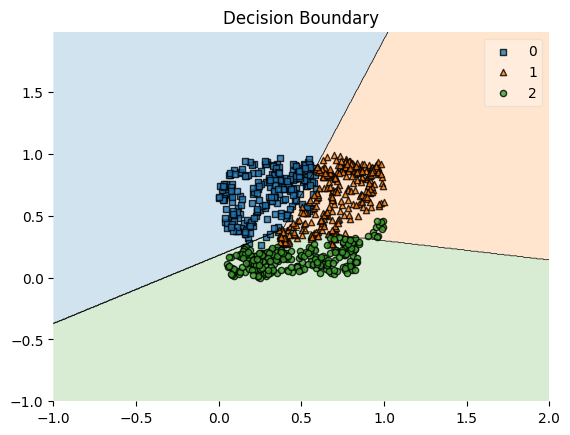

In [ ]:
from mlxtend.plotting import plot_decision_regions
import matplotlib.pyplot as plt

scatter_kwargs = {'s': 20, 'edgecolor': 'black'}
contourf_kwargs = {'alpha': 0.2}

plot_decision_regions(X=x_train, y=y_train, clf=lr_model, scatter_kwargs=scatter_kwargs, contourf_kwargs=contourf_kwargs)
plt.title('Decision Boundary')
plt.show()

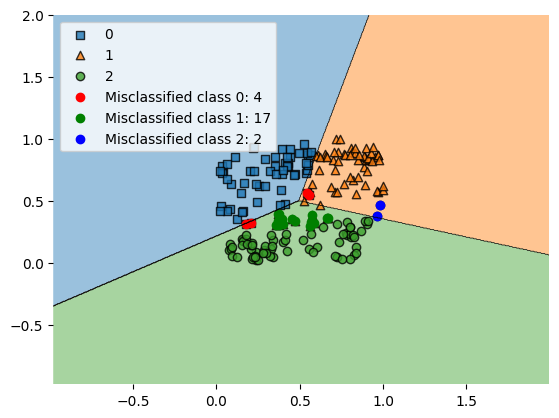

In [ ]:
# رسم نمودار تصمیم‌گیری
plot_decision_regions(x_test, y_test, clf=model_sgd)

# شناسایی داده‌های اشتباه کلاس‌بندی شده
misclassified = np.where(y_test != y_pred)

# تعداد خطاهای کلاس‌بندی شده برای هر کلاس
errors_class_0 = np.sum(y_test[misclassified] == 0)
errors_class_1 = np.sum(y_test[misclassified] == 1)
errors_class_2 = np.sum(y_test[misclassified] == 2)

# نمایش داده‌های اشتباه کلاس‌بندی شده برای کلاس 0 با رنگ قرمز
plt.scatter(x_test[misclassified][y_test[misclassified] == 0, 0],
            x_test[misclassified][y_test[misclassified] == 0, 1],
            color='red', label=f'Misclassified class 0: {errors_class_0}')

# نمایش داده‌های اشتباه کلاس‌بندی شده برای کلاس 1 با رنگ سبز
plt.scatter(x_test[misclassified][y_test[misclassified] == 1, 0],
            x_test[misclassified][y_test[misclassified] == 1, 1],
            color='green', label=f'Misclassified class 1: {errors_class_1}')

# نمایش داده‌های اشتباه کلاس‌بندی شده برای کلاس 2 با رنگ آبی
plt.scatter(x_test[misclassified][y_test[misclassified] == 2, 0],
            x_test[misclassified][y_test[misclassified] == 2, 1],
            color='blue', label=f'Misclassified class 2: {errors_class_2}')

plt.legend()
plt.show()